# **Statistiques descriptives**

Dans un premier temps, pour bien nous familiariser avec la base et mieux comprendre comment elle est composée, nous allons nous intéresser à certaines métriques générale de la base, avant de l'analyser plus spécifiquement.

In [6]:
#installer worldcloud et matplotlib 
!pip install wordcloud 
!pip install matplotlib

In [7]:
#Imports 
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast
from collections import Counter
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Pour corriger certaines imperfections de notre base quand nous la chargeons, et pour alléger le code par la suite, nous définissons une fonction qui charge la base en enlevant les redondances et en reformatant bien les colonnes posant problèmes.

In [8]:
def fonction_charge(path) :
    df = pd.read_csv(path)
    df_f = df.drop_duplicates()
    df_f['release_date'] = pd.to_datetime(df_f['release_date'])
    # De la même façon on convertit la colonne 'budget' qui est composée de chaînes de caractères et non de valeurs numériques
    df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
    df_f['genres_list'] = df_f['genres_list'].apply(ast.literal_eval)
    df_f['countries_prod'] = df_f['countries_prod'].apply(ast.literal_eval)
    df_f['languages_list'] = df_f['languages_list'].apply(ast.literal_eval)
    df_f['prod_companies'] = df_f['prod_companies'].apply(ast.literal_eval)
    return df_f 

In [9]:
df_f = fonction_charge('../cleaning_data/Final_database.csv')

df_f.describe()

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,budget,id,release_date,revenue,runtime,vote_average,vote_count,Award_mains,Award_fest
count,9.179000e+03,9.180000e+03,9169,9.178000e+03,9178.000000,9178.000000,9178.000000,517.000000,517.000000
mean,2.092150e+07,2.560959e+05,2004-11-03 10:36:12.799650944,6.320109e+07,102.909022,6.489652,1642.784812,0.905222,0.116054
min,0.000000e+00,5.000000e+00,1902-04-17 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,1.081550e+04,1996-08-23 00:00:00,0.000000e+00,91.000000,6.000000,170.000000,1.000000,0.000000
50%,3.000000e+06,4.825600e+04,2009-12-25 00:00:00,4.681068e+06,102.000000,6.600000,539.000000,1.000000,0.000000
75%,2.500000e+07,4.472122e+05,2018-07-11 00:00:00,5.362360e+07,116.000000,7.163000,1637.000000,1.000000,0.000000
max,6.000000e+08,1.211963e+06,2031-12-18 00:00:00,2.923706e+09,333.000000,10.000000,34864.000000,1.000000,1.000000
std,4.024156e+07,3.309568e+05,NaN,1.592615e+08,26.081308,1.110733,3051.242935,0.293191,0.320600


In [10]:
# On enlève les films n'ayant pas l'information 'budget' pour pouvoir étudier cette variable plus précisement
df_filtered = df_f[df_f['budget'] != 0]
df_filtered.describe()

,budget,id,release_date,revenue,runtime,vote_average,vote_count,Award_mains,Award_fest
count,5.322000e+03,5.323000e+03,5322,5.322000e+03,5322.000000,5322.000000,5322.000000,447.000000,447.000000
mean,3.608388e+07,1.464732e+05,2002-09-20 06:22:51.815107200,1.062498e+08,109.673243,6.582706,2574.254040,0.948546,0.082774
min,1.000000e+00,5.000000e+00,1902-04-17 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.425000e+06,8.994000e+03,1994-12-28 06:00:00,7.000000e+06,95.000000,6.096000,485.250000,1.000000,0.000000
50%,2.000000e+07,1.622200e+04,2006-11-09 12:00:00,3.735845e+07,106.000000,6.633500,1241.500000,1.000000,0.000000
75%,4.500000e+07,2.463790e+05,2015-03-17 18:00:00,1.177227e+08,120.000000,7.191500,3000.750000,1.000000,0.000000
max,6.000000e+08,1.211354e+06,2031-12-18 00:00:00,2.923706e+09,317.000000,10.000000,34864.000000,1.000000,1.000000
std,4.739192e+07,2.313695e+05,NaN,1.977174e+08,22.532187,0.886580,3707.735878,0.221170,0.275849


In [11]:
# On fait de même avec les films n'ayant pas l'information 'revenue'
df_fil = df_f[df_f['revenue'] != 0]
df_fil.describe()

,budget,id,release_date,revenue,runtime,vote_average,vote_count,Award_mains,Award_fest
count,5.521000e+03,5.522000e+03,5520,5.520000e+03,5520.000000,5520.000000,5520.000000,455.000000,455.000000
mean,3.287791e+07,1.542136e+05,2003-03-07 05:40:10.434782464,1.050833e+08,109.988949,6.638268,2504.692572,0.942857,0.085714
min,0.000000e+00,5.000000e+00,1915-02-08 00:00:00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+06,9.086250e+03,1995-01-09 00:00:00,9.950630e+06,96.000000,6.107750,477.000000,1.000000,0.000000
50%,1.600000e+07,1.743350e+04,2007-03-02 00:00:00,3.760288e+07,107.000000,6.679500,1177.000000,1.000000,0.000000
75%,4.000000e+07,2.633828e+05,2015-07-29 12:00:00,1.145412e+08,120.000000,7.200000,2867.750000,1.000000,0.000000
max,4.600000e+08,1.190665e+06,2023-12-22 00:00:00,2.923706e+09,333.000000,8.709000,34864.000000,1.000000,1.000000
std,4.588465e+07,2.367567e+05,NaN,1.943548e+08,21.010788,0.805443,3657.426007,0.232371,0.280250


In [12]:
# On fait de même avec les films n'ayant pas l'information 'runtime'
df_tim = df_f[df_f['runtime'] != 0]
df_tim.describe()

,budget,id,release_date,revenue,runtime,vote_average,vote_count,Award_mains,Award_fest
count,9.101000e+03,9.102000e+03,9100,9.100000e+03,9100.000000,9100.000000,9100.000000,517.000000,517.000000
mean,2.090300e+07,2.509413e+05,2004-09-18 03:53:14.901098880,6.374270e+07,103.791099,6.525073,1656.812967,0.905222,0.116054
min,0.000000e+00,5.000000e+00,1902-04-17 00:00:00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,1.077125e+04,1996-07-04 00:00:00,0.000000e+00,91.000000,6.012000,175.000000,1.000000,0.000000
50%,3.196621e+06,4.613400e+04,2009-11-12 12:00:00,5.006545e+06,102.000000,6.603000,549.000000,1.000000,0.000000
75%,2.500000e+07,4.386838e+05,2018-05-03 06:00:00,5.482217e+07,116.000000,7.166000,1655.250000,1.000000,0.000000
max,4.600000e+08,1.211354e+06,2024-02-23 00:00:00,2.923706e+09,333.000000,10.000000,34864.000000,1.000000,1.000000
std,3.934753e+07,3.262705e+05,NaN,1.598348e+08,24.382453,1.006528,3060.511697,0.293191,0.320600


On peut déjà tirer de celà plusieurs informations intéressantes. Notre base contient 9179 films, le plus vieux datant du 17/04/1902 et le plus récent étant prévu pour le 18/12/2031. La note moyenne est de 6.48 (sur 10)pour cet échantillon, avec en moyenne 1642 votes par film. Les films dans notre base sont bien des long-métrages, puisque le 1er quartile pour la variable de la durée du film est à 1h31 (il pourrait y avoir quelques court-métrages, mais la majorité reste des long-métrages). On peut aussi obtenir des informations sur l'étendue des variables budget et revenue, en remarquant que le budget le plus élevé correspond à un film qui n'est pas encore sorti et disparaît donc quand on enlève les films sans l'information du revenu. Maintenant que nous avons analyser de façon très générale la base, nous allons étudier plus précisément certaines variables.

# **Visualisation des données** 
Dans cette partie nous allons procéder à la visualisation des données obtenues à la fois à base du scrapping et de l'API de TMDB. Parmi les graphiques que nous souhaitons réaliser : 

-  Les nuages de mots répresentant les genres les plus populaires:
    *  dans toute la base TMDB
    *  Parmi les films nominés aux Oscars/Césars (Award_mains = 1)
    *  Parmi les films nominés aux festivals (Award_fest = 1)

Nous nous intéresserons ensuite, dans un premier temps, au budget des films en fonction de différentes variables, pour dresser un état des lieux de la base, et des conditions de création des films.
- Les budgets de films:
    * par années et par décennies
    * par genre de film
    * par catégorie de compétition
    * par pays de production


Nous allons ensuite nous concentrer sur les notes données par les utilisateurs, pour nous rapprocher là de notre projet, et nous permettra de voir les variables les plus pertinnentes. Pour celà nous allons les représenter en fonction de différentes variables.

- Les notes données par les utilisateurs:
    * par année et par décennie (trouve-t-on les films récents meilleurs ?)
    * par genre de film
    * par catégorie de compétition
    * par pays de production
    * par langue du film
 

In [13]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df.columns
#L'importation s'est bien passée

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'tagline', 'title', 'vote_average', 'vote_count',
       'directors', 'collection_name', 'genres_list', 'countries_prod',
       'languages_list', 'prod_companies', 'Award_mains', 'Mains_cat',
       'Award_fest', 'Fest_cat'],
      dtype='object')

## **Les nuages de mots pour étudier l'occurence de genres**

### **Dans toute la base TMDB**
Nous allons essayer de produire les nuages de mots pour observer quels sont les genres de films les plus présents dans notre base. 
Pour ce faire, nous devons d'abord transformer la colonne 'genres_list' de notre base en chaîne de caractères avec des mots séparés par les espaces, puis le concatener en un seul texte. 

In [14]:
df1 = df
df1['genres_str'] = df1['genres_list'].apply(lambda x: ' '.join(x))

# Convertir la colonne 'genres_str' en chaîne de caractères
df1['genres_str'] = df1['genres_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_global = ' '.join(df1['genres_str'])


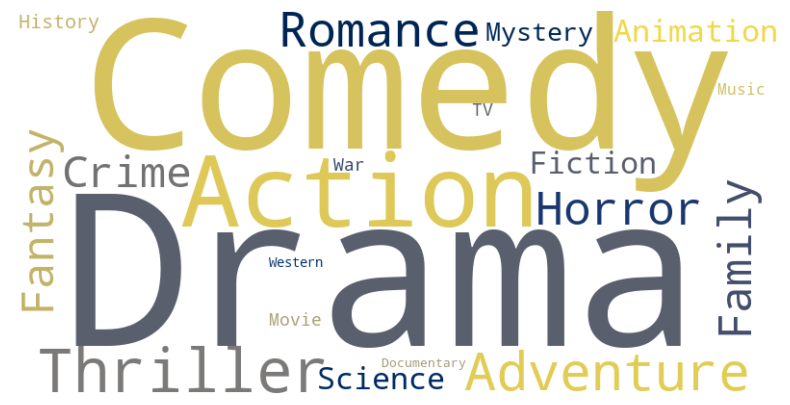

In [15]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_global)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

Clairement, nous pouvons voir que les genres comme Drama, Comedy et Action prévalent dans notre dataset. Qu'en est-il réellement? Nous allons le voir grâce à l'histogramme de l'occurrence des mots

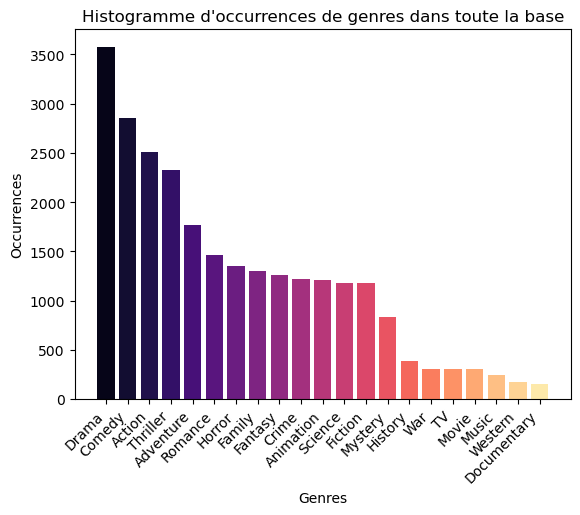

In [16]:
#Pour le bar chart 
genre_counts = Counter(genres_global.split())

# Créer un graphique à barres
genres = list(genre_counts.keys())
occurrences = list(genre_counts.values())
#trier par ordre decroissant pour plus de lisibilité 
genres, occurrences = zip(*sorted(zip(genres, occurrences), key=lambda x: x[1], reverse=True))
#Rajouter des belles couleurs et faire un gradient 
colors = sns.color_palette("magma", n_colors=len(genres))

#afficher le graphe

plt.bar(genres, occurrences, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrences de genres dans toute la base")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Parmi les films nominés dans les compétitions cinématographiques mainstream (Oscar, César)**
Nous allons réproduire cette expérience ensuite en regardant de près les mêmes informations mais pour les films nominés pour les compétitions telles que Oscar et César. 

In [17]:
df1['genres_mains'] = df1.apply(lambda row: row['genres_list'] if row['Award_mains'] == 1 else None, axis=1)

mains = df1[df1['genres_mains'].notnull()]

mains['genres_mains_str'] = mains['genres_mains'].apply(lambda x: ' '.join(x))

# Convertir la colonne 'genres_str' en chaîne de caractères
mains['genres_mains_str'] = mains['genres_mains_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_mains= ' '.join(mains['genres_mains_str'] )


/tmp/ipykernel_4708/3540995963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mains['genres_mains_str'] = mains['genres_mains'].apply(lambda x: ' '.join(x))
/tmp/ipykernel_4708/3540995963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mains['genres_mains_str'] = mains['genres_mains_str'].astype(str)


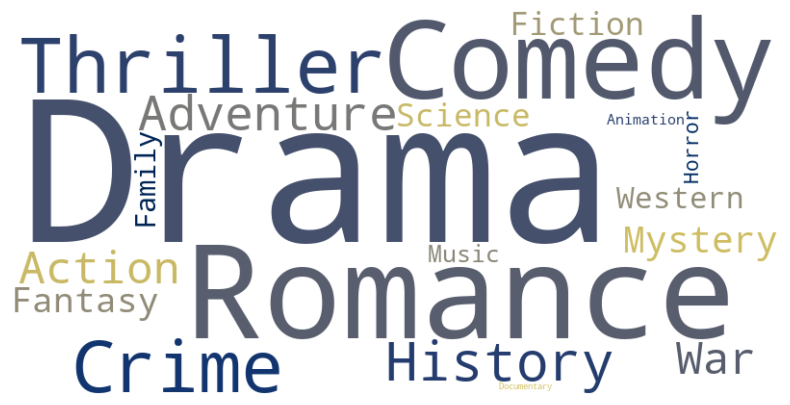

In [18]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_mains)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

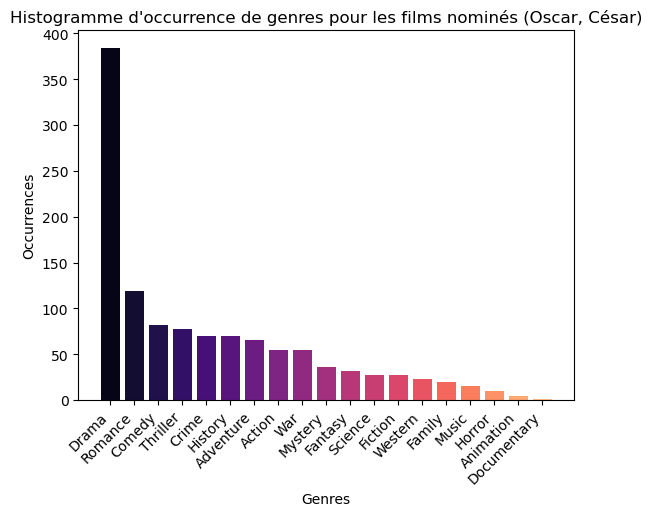

In [19]:
#Histogramme 
genre_mains_ct = Counter(genres_mains.split())

# Créer un graphique à barres
genres_m = list(genre_mains_ct.keys())
occurrences_m = list(genre_mains_ct.values())
#trier par ordre decroissant pour plus de lisibilité 
genres_m, occurrences_m = zip(*sorted(zip(genres_m, occurrences_m), key=lambda x: x[1], reverse=True))

#afficher le graphe

plt.bar(genres_m, occurrences_m, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrence de genres pour les films nominés (Oscar, César)")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Parmi les films nominés dans les festivals cinématographiques (Cannes, Venise)**
Nous allons également analyser et comparer l'occurrence des genres de cinéma parmi les films nominés dans les compétitions telles que le Festival de Cannes et le Festival de Venise.

In [20]:
df1['genres_fest'] = df1.apply(lambda row: row['genres_list'] if row['Award_fest'] == 1 else None, axis=1)

fest = df1[df1['genres_fest'].notnull()]

fest['genres_fest_str'] = fest['genres_fest'].apply(lambda x: ' '.join(x))

# Convertir la colonne 'genres_str' en chaîne de caractères
fest['genres_fest_str'] = fest['genres_fest_str'].astype(str)
#Concaténer toutes les chaînes en un seul texte pour le nuage de mots 
genres_fest= ' '.join(fest['genres_fest_str'] )


/tmp/ipykernel_4708/680207540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fest['genres_fest_str'] = fest['genres_fest'].apply(lambda x: ' '.join(x))
/tmp/ipykernel_4708/680207540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fest['genres_fest_str'] = fest['genres_fest_str'].astype(str)


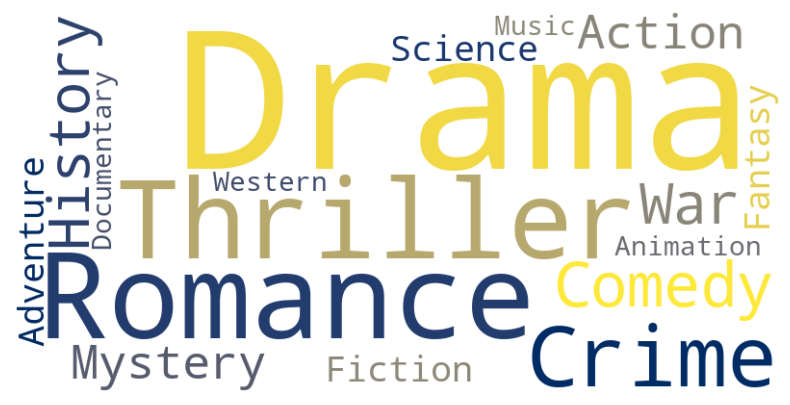

In [21]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap = 'cividis').generate(genres_fest)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

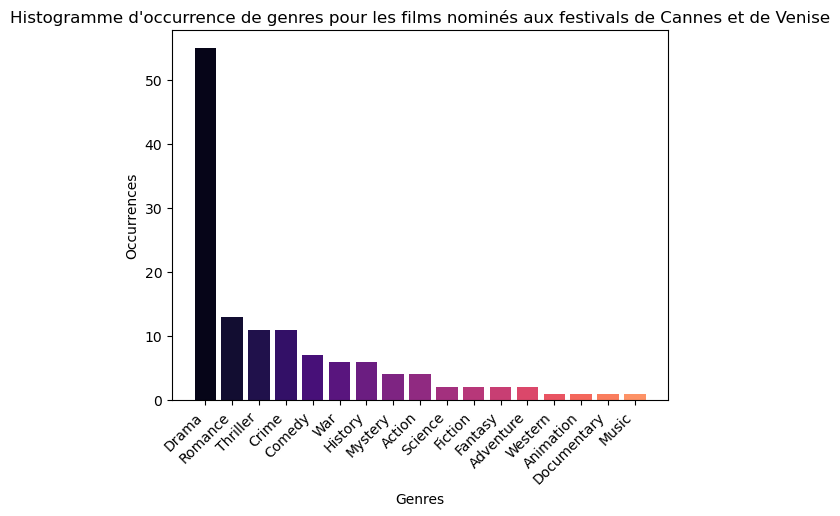

In [22]:
#Histogramme 
genre_fest_ct = Counter(genres_fest.split())

# Créer un graphique à barres
genres_f = list(genre_fest_ct.keys())
occurrences_f = list(genre_fest_ct.values())
#trier par ordre decroissant pour plus de lisibilité 
genres_f, occurrences_f = zip(*sorted(zip(genres_f, occurrences_f), key=lambda x: x[1], reverse=True))

#afficher le graphe

plt.bar(genres_f, occurrences_f, color = colors)
plt.xlabel('Genres')
plt.ylabel('Occurrences')
plt.title("Histogramme d'occurrence de genres pour les films nominés aux festivals de Cannes et de Venise")
plt.xticks(rotation=45, ha='right')
plt.show()

### **Conclusions et limites** 

Nous pouvons observer que le genre de drame reste assez sur-representé que ce soit pour la base toute entière ou pour les films nominés dans l'une des catégories aux récompenses 'mainstream' ou aux festivals. Cela pourrait être dû à la définition floue de ce genre qui permet d'englober un grand nombre de films. EN ce qui concerne les genres les plus representés parmi les nominations, on observe des différences assez notables entre les compétitions mainstream et les festivals. En effet, les derniers contiennet plus de films du genre thriller, crime, films de guerre et d'histoire. Pour les récompenses comme Oscars ou César, nous observons un plus grand nombre de films romance et les comédies qui arrivent en deuxième position juste après le drame. 

Notons aussi que notre analyse peut comporter des biais - en effet, nous n'avons pas étudié toutes les catégories dans lesquelles les films pourraient être nominés, et le nombre de films présents à la fois dans notre base récupérée grâce à l'API et grâce au scrapping reste faible, de l'ordre de 700 toute nomination confondue. Il est donc difficile à le généraliser à toutes les nominations ou compétitions cinématographique, mais étant donné les contraintes techniques pour notre cas (la contrainte de temps, et la difficulté de nettoyage des données scrappées sur Wikipédia), ces résultats restent intéressants pour notre analyse et la construction de l'algorithme de recommendation. 


## **Les nuages de mots pour étudier les synopsis par rapport aux genres**

In [23]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,directors,collection_name,genres_list,countries_prod,languages_list,prod_companies,Award_mains,Mains_cat,Award_fest,Fest_cat
0,False,40000000.0,897087,tt15744298,en,Freelance,An ex-special forces operative takes a job to ...,2367.027,2023-10-05,8000000.0,...,['Pierre Morel'],NaN,"[Action, Comedy]",[United States of America],"[English, Spanish]","[(Endurance Media, US), (AGC Studios, US), (Se...",NaN,NaN,NaN,NaN
1,False,200000000.0,466420,tt5537002,en,Killers of the Flower Moon,When oil is discovered in 1920s Oklahoma under...,1806.389,2023-10-18,155500000.0,...,['Martin Scorsese'],NaN,"[Crime, Drama, History]",[United States of America],"[English, French, Latin]","[(Apple Studios, US), (Imperative Entertainmen...",NaN,NaN,NaN,NaN
2,False,95000000.0,901362,tt14362112,en,Trolls Band Together,"When Branch's brother, Floyd, is kidnapped for...",1560.713,2023-10-12,173800000.0,...,['Walt Dohrn'],The Trolls Collection,"[Animation, Family, Music, Fantasy, Comedy]",[United States of America],"[English, Lithuanian]","[(DreamWorks Animation, US)]",NaN,NaN,NaN,NaN
3,False,0.0,1075794,tt5755238,en,Leo,Jaded 74-year-old lizard Leo has been stuck in...,1303.89,2023-11-17,0.0,...,"['Robert Smigel', 'Robert Marianetti', 'David ...",NaN,"[Animation, Comedy, Family]","[Australia, United States of America]",[English],"[(Happy Madison Productions, US), (Animal Logi...",NaN,NaN,NaN,NaN
4,False,125000000.0,787699,tt6166392,en,Wonka,Willy Wonka – chock-full of ideas and determin...,1256.256,2023-12-06,43200000.0,...,['Paul King'],NaN,"[Comedy, Family, Fantasy]","[United Kingdom, United States of America]",[English],"[(Warner Bros. Pictures, US), (Village Roadsho...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,False,0.0,472338,tt5534434,en,Victor Crowley,"Ten years ago, over forty people were brutally...",30.668,2017-09-12,0.0,...,['Adam Green'],Hatchet Collection,"[Comedy, Horror]",[United States of America],[English],"[(ArieScope Pictures, US)]",NaN,NaN,NaN,NaN
12013,False,0.0,605116,tt7550000,en,Project Power,"An ex-soldier, a teen and a cop collide in New...",30.55,2020-08-14,0.0,...,"['Henry Joost', 'Ariel Schulman']",NaN,"[Action, Crime, Science Fiction]",[United States of America],"[English, Hindi, Portuguese]","[(Screen Arcade, US), (Supermarché, US)]",NaN,NaN,NaN,NaN
12014,False,4000000.0,17455,tt0337636,en,Hellraiser: Deader,"In London, after investigating crack addicted ...",30.664,2005-06-07,0.0,...,['Rick Bota'],Hellraiser Collection,"[Horror, Mystery, Thriller]","[Romania, United States of America]",[English],"[(Dimension Films, US), (Stan Winston Producti...",NaN,NaN,NaN,NaN
12015,False,45000000.0,15045,tt0396592,en,Fat Albert,Animated character Fat Albert emerges from his...,30.536,2004-12-25,48600000.0,...,['Joel Zwick'],NaN,"[Comedy, Family, Fantasy]",[United States of America],[English],"[(Culver Studios, US), (20th Century Fox, US)]",NaN,NaN,NaN,NaN


In [24]:
df1 = df
#préparer notre dataset

df1 = df1.dropna(subset = ['overview'] ) #suppression des lignes où il n'y a pas de synopsis
df1['synop'] = df1['overview'].astype(str) #conversion en str de la colonne
#définition de la liste des stopwords pour le nuage des mots  - avec des mots qui peuvent parasiter l'analyse
mes_mots = ['one', 'two', 'must', 'family', 'man', 'woman', 'find']
#en faisant une première analyse, ces mots apparaîssaient souvent mais sont peu pertinents pour nous
stop_words = set(stopwords.words('english') + mes_mots)

#Fonction qui permet de faire les nuages de mots par genre 

def nuage_mot (genre): 
    #sélection de films du genre qui nous intéresse
    genre_movies = df1[df1['genres_list'].apply(lambda x: genre in x)]
    genre_overviews = ' '.join(genre_movies['synop'])
    #tokeization 
    words = word_tokenize(genre_overviews)
    # Filtrage des stopwords
    genre_f = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    # Création du WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(genre_f))
    return wordcloud

/tmp/ipykernel_4708/554787691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['synop'] = df1['overview'].astype(str) #conversion en str de la colonne


In [25]:
drama = nuage_mot('Drama')
thr = nuage_mot('Thriller')
hor = nuage_mot('Horror')
com = nuage_mot('Comedy')

### **Drama**

Nous commençons par afficher le nuage de mot correspondant aux synopsis des films du genr Drama, qui est le genre le plus représenté dans notre base.

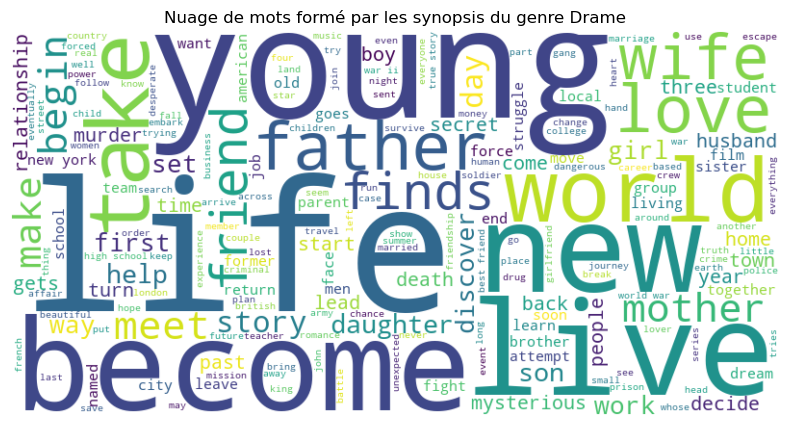

In [26]:
# Affichage du WordCloud pour le genre Drama
plt.figure(figsize=(10, 5))
plt.imshow(drama, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots formé par les synopsis du genre Drame')
plt.show()

### **Thriller**

Nous passons ensuite au genre du Thriller.

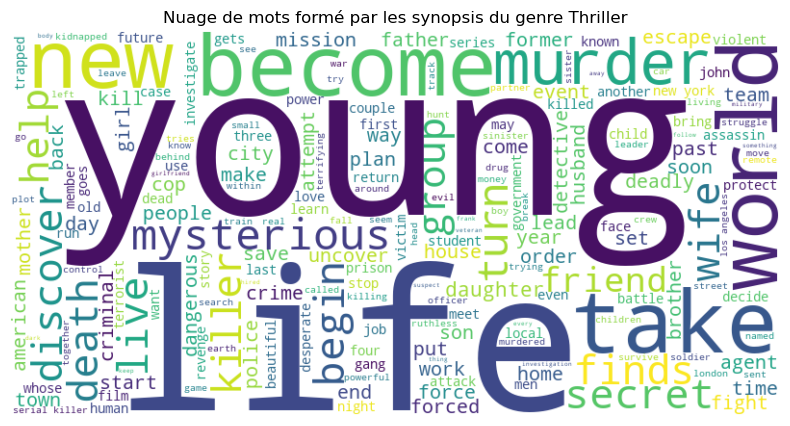

In [27]:
# Affichage du WordCloud pour le genre Thriller
plt.figure(figsize=(10, 5))
plt.imshow(thr, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots formé par les synopsis du genre Thriller')
plt.show()

### **Horror**

Puis, nous passons au genre de l'Horreur.

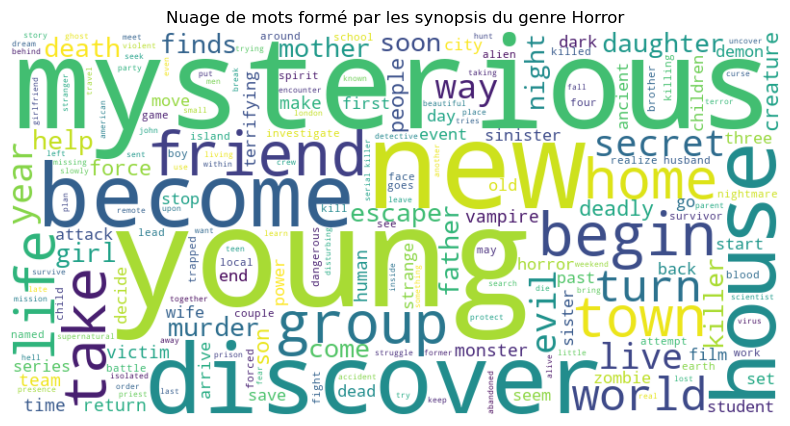

In [28]:
# Affichage du WordCloud pour le genre Horror
plt.figure(figsize=(10, 5))
plt.imshow(hor, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots formé par les synopsis du genre Horror')
plt.show()

### **Comedy**

Enfin, nous finissons par le genre de la Comédie.

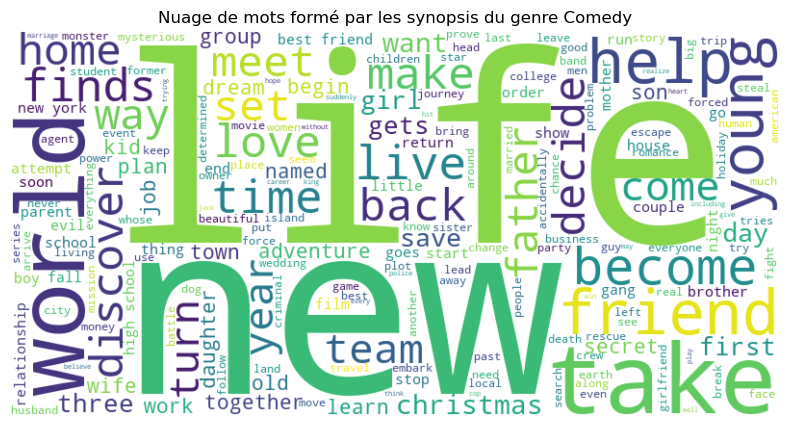

In [29]:
# Affichage du WordCloud pour le genre Comedy
plt.figure(figsize=(10, 5))
plt.imshow(com, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots formé par les synopsis du genre Comedy')
plt.show()

## **La variable budget**

Dans un premier temps, nous allons essayer de comparer les différents budget des films en fonction de plusieurs critères, afin de voir à quel point le budget d'un film peut être caractéristique d'un film. 

### **Évolution temporelle du budget moyen**
Nous commençons par un premier graphique afin de représenter l'évolution du budget moyen à travers le temps.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

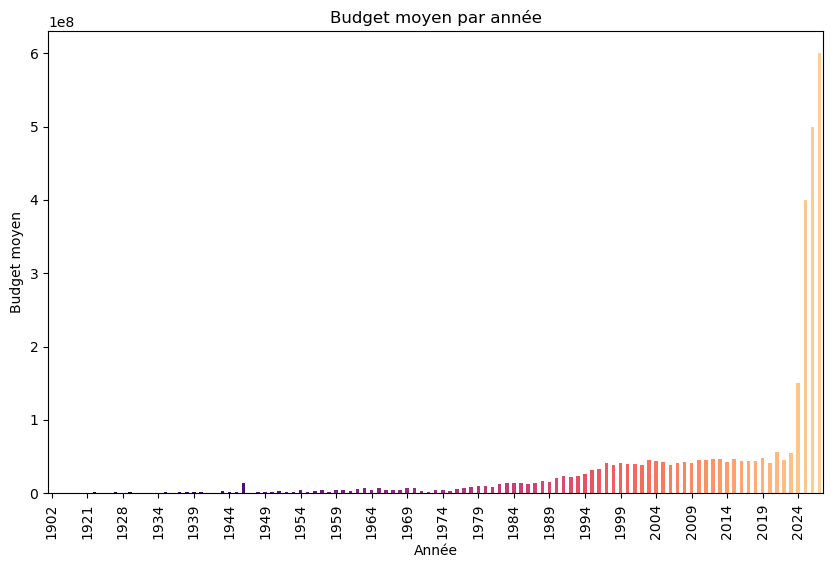

In [30]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df = df.dropna(subset=['release_date'])

# On exclut les films pour lequel le budget n'est pas renseigné, auquel cas il est égal à 0 dans la base
df_filtered = df[df['budget'] != 0]

colors2 = sns.color_palette("magma", n_colors = 120)
colors3 = sns.color_palette("light:#5A9", n_colors = 15 )
colors4 = sns.color_palette("magma", n_colors = 20)
colors5 = sns.color_palette("magma", n_colors = 50)

# Par années
# On récupère l'année de sortie du film
df_filtered['year'] = df_filtered['release_date'].dt.year.astype(int)
# On regroupe par année pour calculer la moyenne
mean_budget_per_year = df_filtered.groupby('year')['budget'].mean()

# On représente le résultat sous forme de graphique
plt.figure(figsize=(10, 6))
mean_budget_per_year.plot(kind='bar', color=colors2)

#On affiche une année sur 5 seulement pour plus de lisibilité
plt.gca().xaxis.set_major_locator(MultipleLocator(base=5))
plt.title('Budget moyen par année')
plt.xlabel('Année')
plt.ylabel('Budget moyen')
plt.show()


/tmp/ipykernel_4708/1139525938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['decade'] = ((df_filtered['release_date'].dt.year // 10) * 10).astype(int)


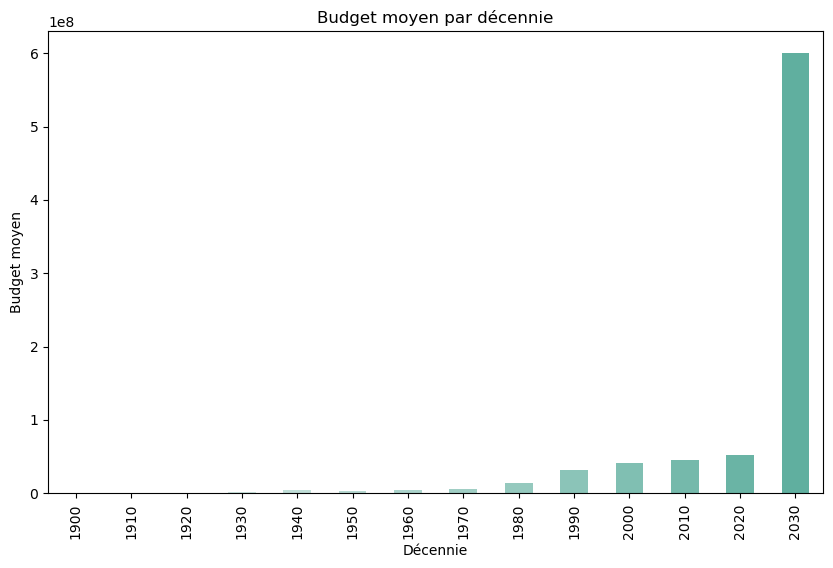

In [31]:
# Par décennies
# On récupère la décennie de sortie du film
df_filtered['decade'] = ((df_filtered['release_date'].dt.year // 10) * 10).astype(int)

# On regroupe par décennie et on calcule la moyenne
mean_budget_per_decade = df_filtered.groupby('decade')['budget'].mean()

# On représente les résultats
plt.figure(figsize=(10, 6))
mean_budget_per_decade.plot(kind='bar', color=colors3)

plt.title('Budget moyen par décennie')
plt.xlabel('Décennie')
plt.ylabel('Budget moyen')
plt.show()

In [32]:
df_filtered['decade'].value_counts()

decade
2010    1641
2000    1359
1990     808
2020     521
1980     479
1970     202
1960     134
1950      93
1940      43
1930      30
1920       7
1910       2
1900       2
2030       1
Name: count, dtype: int64

In [33]:
df_filtered[df_filtered['decade'] == 2030]

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,genres_list,countries_prod,languages_list,prod_companies,Award_mains,Mains_cat,Award_fest,Fest_cat,year,decade
9273,False,600000000.0,393209,tt5637536,en,Avatar 5,NaN,31.288,2031-12-18,0.0,...,"[Action, Adventure, Science Fiction]",[United States of America],[English],"[(Lightstorm Entertainment, US), (20th Century...",NaN,NaN,NaN,NaN,2031,2030


Un problème se présente d'ores et déjà : les films Avatar, qui ne sont pas encore sortis, mais prévus pour jusqu'en 2030 vont fausser les visualisations. Nous allons donc reprendre les graphiques en enlevant les années et décennies n'étant pas assez fournies pour être intéressantes pour nous.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

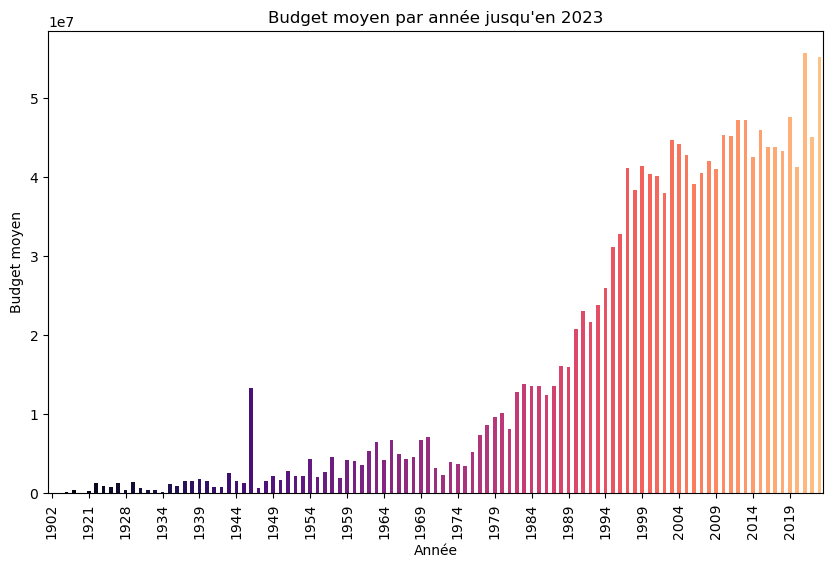

In [34]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df = df.dropna(subset=['release_date'])

# On exclut les films pour lequel le budget n'est pas renseigné, auquel cas il est égal à 0 dans la base
df_filtered = df[df['budget'] != 0]


# Par années
# On récupère l'année de sortie du film et on exclut les films prévus mais pas encore sortis
df_filtered['year'] = df_filtered['release_date'].dt.year.astype(int)
df_filtered = df_filtered[~df_filtered['year'].isin(range(2024,2032))]

# On regroupe par année pour calculer la moyenne
mean_budget_per_year = df_filtered.groupby('year')['budget'].mean()

# On représente les résultats
plt.figure(figsize=(10, 6))
mean_budget_per_year.plot(kind='bar', color=colors2)
plt.gca().xaxis.set_major_locator(MultipleLocator(base=5))
plt.title('Budget moyen par année jusqu\'en 2023')
plt.xlabel('Année')
plt.ylabel('Budget moyen')
plt.show()

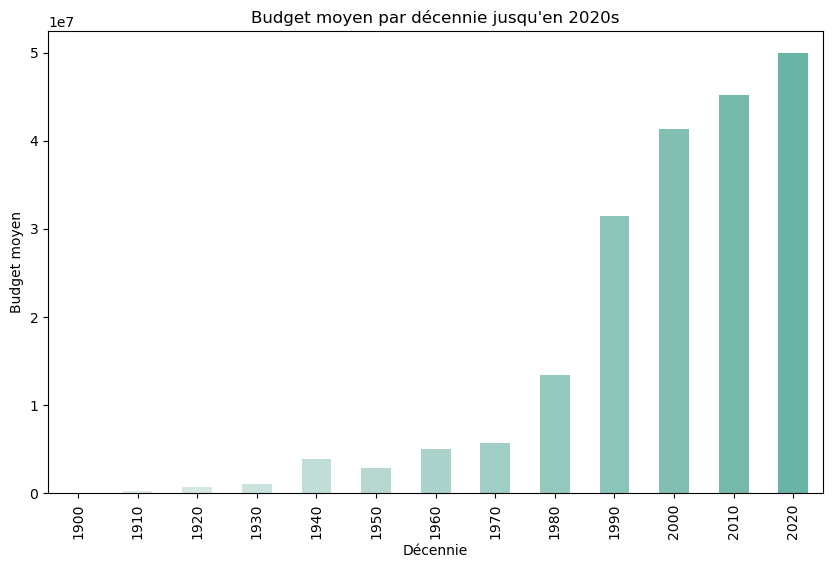

In [35]:
# Par décennies
# On récupère la décennie de sortie du film en ayant enlevé les années post 2023
df_filtered['decade'] = ((df_filtered['release_date'].dt.year // 10) * 10).astype(int)

# On regroupe par décennie et on calcule la moyenne
mean_budget_per_decade = df_filtered.groupby('decade')['budget'].mean()

# On représente les résultats
plt.figure(figsize=(10, 6))
mean_budget_per_decade.plot(kind='bar', color=colors3)
plt.title('Budget moyen par décennie jusqu\'en 2020s')
plt.xlabel('Décennie')
plt.ylabel('Budget moyen')
plt.show()

Ces graphiques sont maintenant un peu plus lisibles, et surtout moins biaisés, puisque pour les années postérieures à 2023, la base ne contenait pas plus d'un film par an, ce qui donnait ne donnait pas une moyenne. On voit bien que le budget moyen a tendance a augmenter très fortement.

### **Budget moyen par genre**

Nous allons maintenant représenter le budget moyen par films en fonction du genre du film. Toutefois, dans notre base, la colonne genre comporte des listes rassemblant le ou les genres de chaque film. Nous allons donc utiliser la méthode explode pour duppliquer chaque lignes pour cahque genre dans la liste, et ensuite regrouper par genre individuel.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

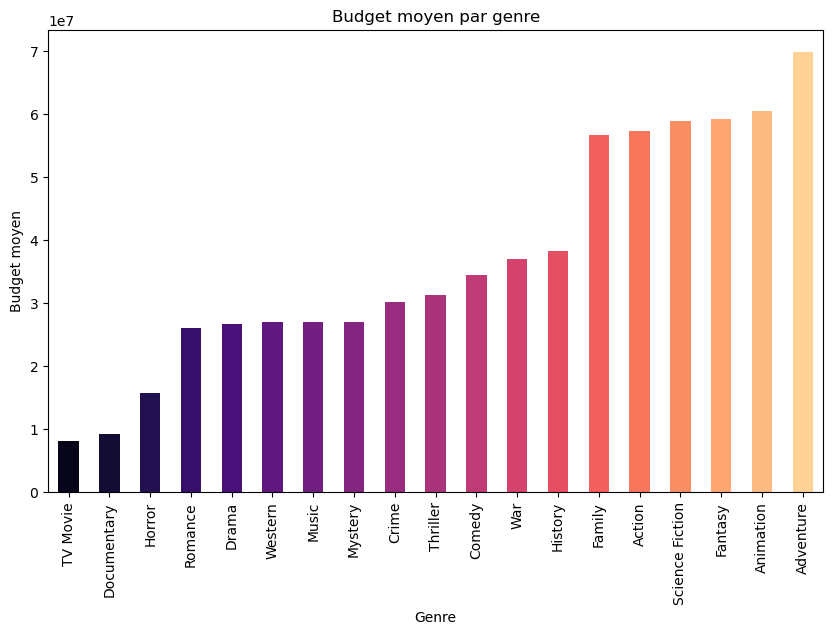

In [36]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df_filtered = df[df['budget'] != 0]

# On utilise la méthode explode
df_genre = df_filtered.explode('genres_list')

# On regroupe par genre et on calcule la moyenne
mean_budget_per_genre = df_genre.groupby('genres_list')['budget'].mean()
 
# On représente le résultat
plt.figure(figsize=(10, 6))
mean_budget_per_genre.sort_values().plot(kind='bar', color=colors4)
plt.title('Budget moyen par genre')
plt.xlabel('Genre')
plt.ylabel('Budget moyen')
plt.show()

### **Budget moyen par compétition**

Ayant beaucoup moins de données correspondant aux différentes compétitions, ces résultats seront probablement moins précis, mais ils permettront toutefois d'avoir une idée de la base que nous manipulons. Nous allons d'abord nous intéresser aux compétitions "mainstream", puis aux festivals.

Pour visualiser ces données, nous allons créer une nouvelle variable qui pour chaque film aura comme valeur 'Mains' si le film a reçu un prix soit aux Oscars soit aux Césars, 'Fest' si le film a reçu un prix dans un festival, les deux si le film a reçu un prix dans les deux, et rien sinon.

In [37]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df_filtered = df[df['budget'] != 0]

df_filtered['Type_awards'] = df_filtered.apply(lambda row: "['Mainstream']" if row['Award_mains'] > 0 and row['Award_fest'] <= 0 
                                               else ("['Festival']" if row['Award_fest'] > 0 and row['Award_mains'] <= 0 
                                                     else ("['Mainstream','Festival']" if row['Award_fest'] > 0 and row['Award_mains'] > 0 
                                                           else "[]")), axis=1)
df_filtered

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,collection_name,genres_list,countries_prod,languages_list,prod_companies,Award_mains,Mains_cat,Award_fest,Fest_cat,Type_awards
0,False,40000000.0,897087,tt15744298,en,Freelance,An ex-special forces operative takes a job to ...,2367.027,2023-10-05,8000000.0,...,NaN,"[Action, Comedy]",[United States of America],"[English, Spanish]","[(Endurance Media, US), (AGC Studios, US), (Se...",NaN,NaN,NaN,NaN,[]
1,False,200000000.0,466420,tt5537002,en,Killers of the Flower Moon,When oil is discovered in 1920s Oklahoma under...,1806.389,2023-10-18,155500000.0,...,NaN,"[Crime, Drama, History]",[United States of America],"[English, French, Latin]","[(Apple Studios, US), (Imperative Entertainmen...",NaN,NaN,NaN,NaN,[]
2,False,95000000.0,901362,tt14362112,en,Trolls Band Together,"When Branch's brother, Floyd, is kidnapped for...",1560.713,2023-10-12,173800000.0,...,The Trolls Collection,"[Animation, Family, Music, Fantasy, Comedy]",[United States of America],"[English, Lithuanian]","[(DreamWorks Animation, US)]",NaN,NaN,NaN,NaN,[]
4,False,125000000.0,787699,tt6166392,en,Wonka,Willy Wonka – chock-full of ideas and determin...,1256.256,2023-12-06,43200000.0,...,NaN,"[Comedy, Family, Fantasy]","[United Kingdom, United States of America]",[English],"[(Warner Bros. Pictures, US), (Village Roadsho...",NaN,NaN,NaN,NaN,[]
5,False,100000000.0,872585,tt15398776,en,Oppenheimer,The story of J. Robert Oppenheimer's role in t...,1071.012,2023-07-19,951000000.0,...,NaN,"[Drama, History]","[United Kingdom, United States of America]","[Dutch, English]","[(Syncopy, GB), (Universal Pictures, US), (Atl...",NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,False,6000000.0,20756,tt0171725,en,The Secret of NIMH 2: Timmy to the Rescue,"The rats and mice, made intellectually superio...",17.357,1998-12-22,0.0,...,The Secret of NIMH Collection,"[Animation, Family]",[United States of America],[English],"[(Metro-Goldwyn-Mayer, US), (Wang Film Product...",NaN,NaN,NaN,NaN,[]
12011,False,6000000.0,503346,tt6774786,en,Occupation,Town residents must band together after a deva...,30.668,2018-07-12,0.0,...,Occupation Collection,"[Action, Science Fiction, Drama]",[Australia],[English],"[(Film Mode Entertainment, US)]",NaN,NaN,NaN,NaN,[]
12014,False,4000000.0,17455,tt0337636,en,Hellraiser: Deader,"In London, after investigating crack addicted ...",30.664,2005-06-07,0.0,...,Hellraiser Collection,"[Horror, Mystery, Thriller]","[Romania, United States of America]",[English],"[(Dimension Films, US), (Stan Winston Producti...",NaN,NaN,NaN,NaN,[]
12015,False,45000000.0,15045,tt0396592,en,Fat Albert,Animated character Fat Albert emerges from his...,30.536,2004-12-25,48600000.0,...,NaN,"[Comedy, Family, Fantasy]",[United States of America],[English],"[(Culver Studios, US), (20th Century Fox, US)]",NaN,NaN,NaN,NaN,[]


/tmp/ipykernel_4708/1642855260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Type_awards'] = df_filtered['Type_awards'].apply(ast.literal_eval)


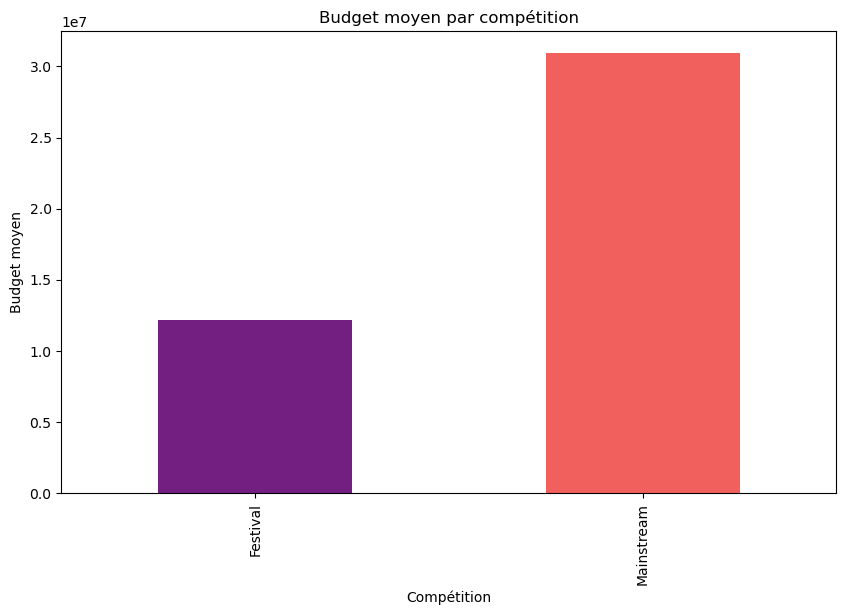

In [38]:
df_filtered['Type_awards'] = df_filtered['Type_awards'].apply(ast.literal_eval)
df_awards = df_filtered.explode('Type_awards')

# Group by genre and calculate the mean budget
mean_budget_per_awards = df_awards.groupby('Type_awards')['budget'].mean()

colors = sns.color_palette("magma", n_colors=2)
# Plot the results with manual x-axis labels
plt.figure(figsize=(10, 6))
mean_budget_per_awards.sort_values().plot(kind='bar', color=colors)
plt.title('Budget moyen par compétition')
plt.xlabel('Compétition')
plt.ylabel('Budget moyen')
plt.show()

### **Budget moyen par pays de production**

Nous nous intéressons maintenant au budget moyen des films en fonction du pays de production.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

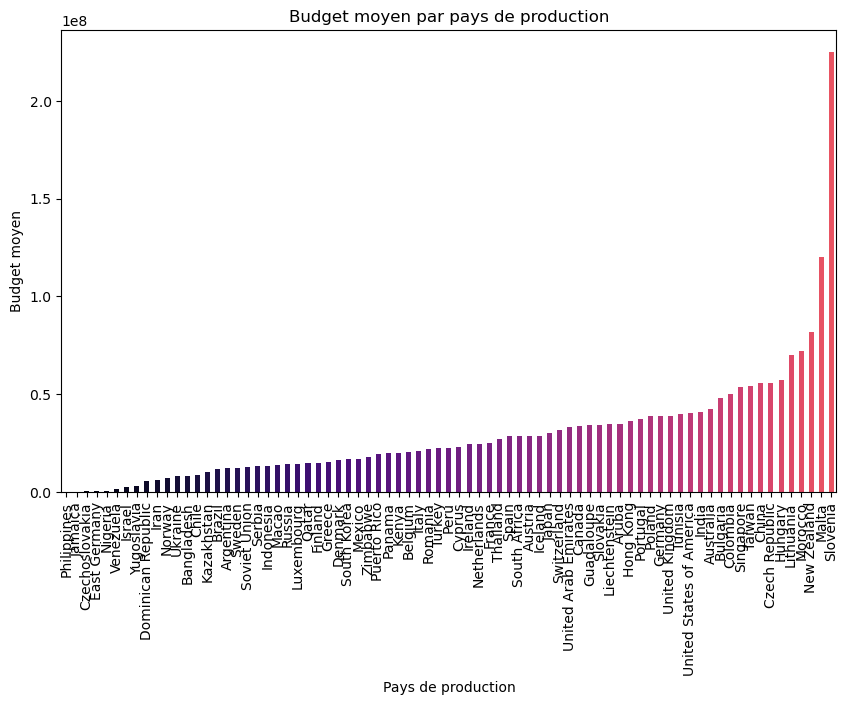

In [39]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df_filtered = df[df['budget'] != 0]

# On utilise la méthode explode
df_country = df_filtered.explode('countries_prod')

# On regroupe par genre et on calcule la moyenne
mean_budget_per_country = df_country.groupby('countries_prod')['budget'].mean()

# On représente le résultat
plt.figure(figsize=(10, 6))
mean_budget_per_country.sort_values().plot(kind='bar', color=colors2)
plt.title('Budget moyen par pays de production')
plt.xlabel('Pays de production')
plt.ylabel('Budget moyen')
plt.show()

In [40]:
df_country[df_country['countries_prod'] == 'Slovenia']

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,directors,collection_name,genres_list,countries_prod,languages_list,prod_companies,Award_mains,Mains_cat,Award_fest,Fest_cat
631,False,225000000.0,2454,tt0499448,en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,80.89,2008-05-15,419665568.0,...,['Andrew Adamson'],The Chronicles of Narnia Collection,"[Adventure, Family, Fantasy]",Slovenia,[English],"[(Walt Disney Pictures, US), (Walden Media, US...",NaN,NaN,NaN,NaN


On voit que les pays les plus haut dans la liste sont en fait des pays où très peu de films ont été tourné, et donc où les moyennes sont biasées. Pour éviter celà nous allons essayer d'exclure les pays avec moins de films dans la base.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

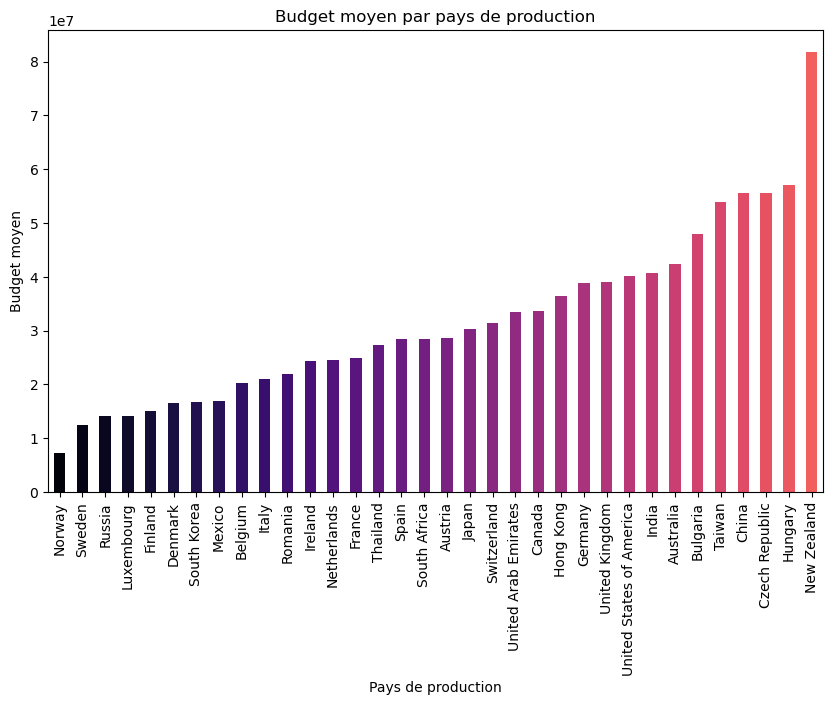

In [41]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df_filtered = df[df['budget'] != 0]

# On utilise la méthode explode
df_country = df_filtered.explode('countries_prod')

# On compte pour chaque pays le nombre de films produits puis on fixe, arbitrairement, une limite pour être inclus
country_counts = df_country['countries_prod'].value_counts()
min_movies_threshold = 10  # Adjust this threshold as needed

# On filtre la base pour n'inclure que les pays ayant assez de films produits
df_10 = df_country[df_country['countries_prod'].isin(country_counts[country_counts >= min_movies_threshold].index)]

# On regroupe par pays et on calcule la moyenne
mean_budget_per_country = df_10.groupby('countries_prod')['budget'].mean()


# On représente le résultat
plt.figure(figsize=(10, 6))
mean_budget_per_country.sort_values().plot(kind='bar', color=colors5)
plt.title('Budget moyen par pays de production')
plt.xlabel('Pays de production')
plt.ylabel('Budget moyen')
plt.show()

## **La variable note (vote_average)**

Nous allons maintenant nous intéresser aux différentes variables qui semblent influencer les notes des utilisateurs, ce qui nous intéressera particulièrement pour concevoir notre algorithme de recommendation.

### **Évolution temporelle de la moyenne des notes**

Nous allons maintenant nous intéresser à l'évolution des notes moyennes par années (et décennie) pour voir si l'on peut remarquer un biais de récence ("recency bias"), qui est un biais dont on entend souvent parler.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

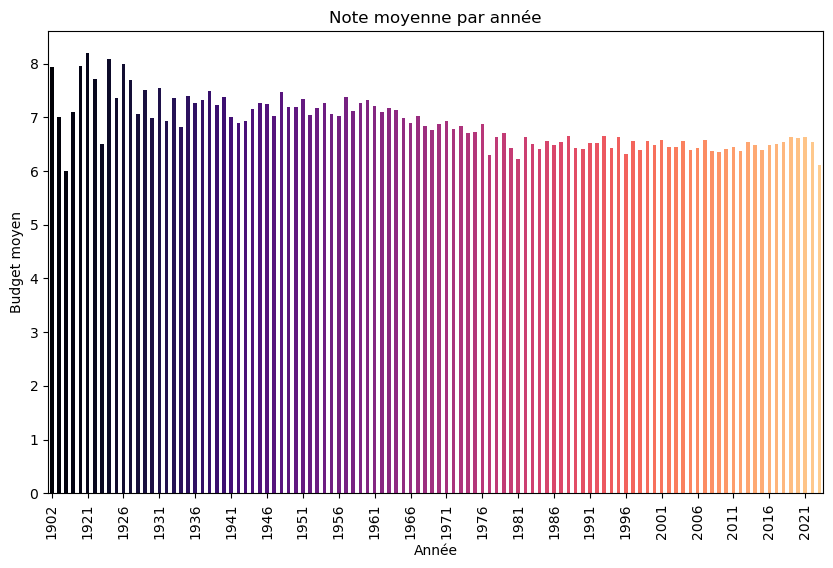

In [42]:
df = fonction_charge('../cleaning_data/Final_database.csv')
df = df.dropna(subset=['release_date'])

# Par années
# On récupère l'année de sortie du film, et de la même façon que pour le budget on ne garde que les films effectivement sortis
df['year'] = df['release_date'].dt.year.astype(int)
df = df[~df['year'].isin(range(2024,2032))]

# On regroupe par année pour calculer la moyenne
mean_note_per_year = df.groupby('year')['vote_average'].mean()

# On représente le résultat
plt.figure(figsize=(10, 6))
mean_note_per_year.plot(kind='bar', color=colors2)
plt.gca().xaxis.set_major_locator(MultipleLocator(base=5))
plt.title('Note moyenne par année')
plt.xlabel('Année')
plt.ylabel('Budget moyen')
plt.show()

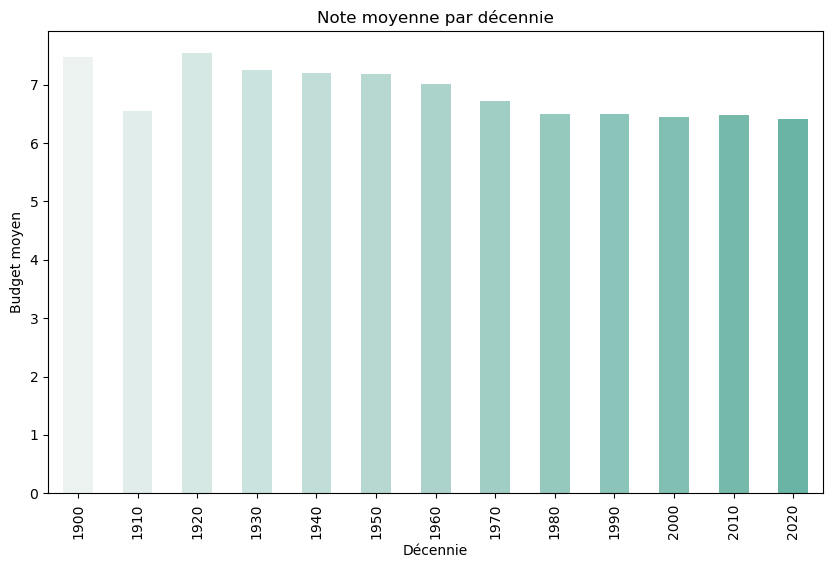

In [43]:
# Par décennies
# On récupère la décennie de sortie du film
df['decade'] = ((df['release_date'].dt.year // 10) * 10).astype(int)

# On regroupe par décennie et on calcule la moyenne
mean_note_per_decade = df.groupby('decade')['vote_average'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mean_note_per_decade.plot(kind='bar', color=colors3)
plt.title('Note moyenne par décennie')
plt.xlabel('Décennie')
plt.ylabel('Budget moyen')
plt.show()

Bien sur, au vu de la petite taille de notre base, et donc pour certaines années d'un manque probable de données, nous ne pouvons tirer de conclusions définitives, mais le biais de récence ne semble pas vérifié, au contraire.

### **Notes moyennes des utilisateurs par genre**

On s'intéresse maintenant aux notes en fonction du genre, pour voir si des genres seraient beaucoup plus appréciés que d'autres.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

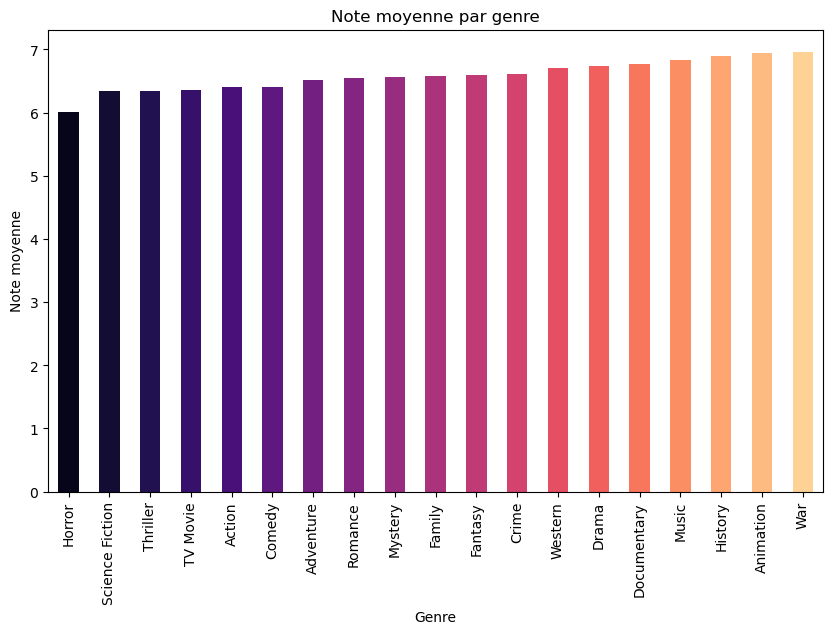

In [44]:
df = fonction_charge('../cleaning_data/Final_database.csv')

#On utilise la méthode explode
df_genre = df.explode('genres_list')

# On regroupe par genre et on calcule la moyenne
mean_note_per_genre = df_genre.groupby('genres_list')['vote_average'].mean()

# On représente le résultat
plt.figure(figsize=(10, 6))
mean_note_per_genre.sort_values().plot(kind='bar', color=colors4)
plt.title('Note moyenne par genre')
plt.xlabel('Genre')
plt.ylabel('Note moyenne')
plt.show()

### **Note moyenne par compétition**

Nous nous intéressons maintenant à la répartition des notes en fonction des différents types de compétition. Nous nous attendons à voir une note moyenne plus importante pour les compétitions "mainstreams" qui devraient être plus consesnsuelles, alors que les films participants à des festivals risquent d'être plus clivants On réutilise la variable créée plus haut..

In [45]:
df = fonction_charge('../cleaning_data/Final_database.csv')

df_filtered['Type_awards'] = df_filtered.apply(lambda row: "['Mainstream']" if row['Award_mains'] > 0 and row['Award_fest'] <= 0 
                                               else ("['Festival']" if row['Award_fest'] > 0 and row['Award_mains'] <= 0 
                                                     else ("['Mainstream','Festival']" if row['Award_fest'] > 0 and row['Award_mains'] > 0 
                                                           else "[]")), axis=1)
df_filtered

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,collection_name,genres_list,countries_prod,languages_list,prod_companies,Award_mains,Mains_cat,Award_fest,Fest_cat,Type_awards
0,False,40000000.0,897087,tt15744298,en,Freelance,An ex-special forces operative takes a job to ...,2367.027,2023-10-05,8000000.0,...,NaN,"[Action, Comedy]",[United States of America],"[English, Spanish]","[(Endurance Media, US), (AGC Studios, US), (Se...",NaN,NaN,NaN,NaN,[]
1,False,200000000.0,466420,tt5537002,en,Killers of the Flower Moon,When oil is discovered in 1920s Oklahoma under...,1806.389,2023-10-18,155500000.0,...,NaN,"[Crime, Drama, History]",[United States of America],"[English, French, Latin]","[(Apple Studios, US), (Imperative Entertainmen...",NaN,NaN,NaN,NaN,[]
2,False,95000000.0,901362,tt14362112,en,Trolls Band Together,"When Branch's brother, Floyd, is kidnapped for...",1560.713,2023-10-12,173800000.0,...,The Trolls Collection,"[Animation, Family, Music, Fantasy, Comedy]",[United States of America],"[English, Lithuanian]","[(DreamWorks Animation, US)]",NaN,NaN,NaN,NaN,[]
4,False,125000000.0,787699,tt6166392,en,Wonka,Willy Wonka – chock-full of ideas and determin...,1256.256,2023-12-06,43200000.0,...,NaN,"[Comedy, Family, Fantasy]","[United Kingdom, United States of America]",[English],"[(Warner Bros. Pictures, US), (Village Roadsho...",NaN,NaN,NaN,NaN,[]
5,False,100000000.0,872585,tt15398776,en,Oppenheimer,The story of J. Robert Oppenheimer's role in t...,1071.012,2023-07-19,951000000.0,...,NaN,"[Drama, History]","[United Kingdom, United States of America]","[Dutch, English]","[(Syncopy, GB), (Universal Pictures, US), (Atl...",NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12010,False,6000000.0,20756,tt0171725,en,The Secret of NIMH 2: Timmy to the Rescue,"The rats and mice, made intellectually superio...",17.357,1998-12-22,0.0,...,The Secret of NIMH Collection,"[Animation, Family]",[United States of America],[English],"[(Metro-Goldwyn-Mayer, US), (Wang Film Product...",NaN,NaN,NaN,NaN,[]
12011,False,6000000.0,503346,tt6774786,en,Occupation,Town residents must band together after a deva...,30.668,2018-07-12,0.0,...,Occupation Collection,"[Action, Science Fiction, Drama]",[Australia],[English],"[(Film Mode Entertainment, US)]",NaN,NaN,NaN,NaN,[]
12014,False,4000000.0,17455,tt0337636,en,Hellraiser: Deader,"In London, after investigating crack addicted ...",30.664,2005-06-07,0.0,...,Hellraiser Collection,"[Horror, Mystery, Thriller]","[Romania, United States of America]",[English],"[(Dimension Films, US), (Stan Winston Producti...",NaN,NaN,NaN,NaN,[]
12015,False,45000000.0,15045,tt0396592,en,Fat Albert,Animated character Fat Albert emerges from his...,30.536,2004-12-25,48600000.0,...,NaN,"[Comedy, Family, Fantasy]",[United States of America],[English],"[(Culver Studios, US), (20th Century Fox, US)]",NaN,NaN,NaN,NaN,[]


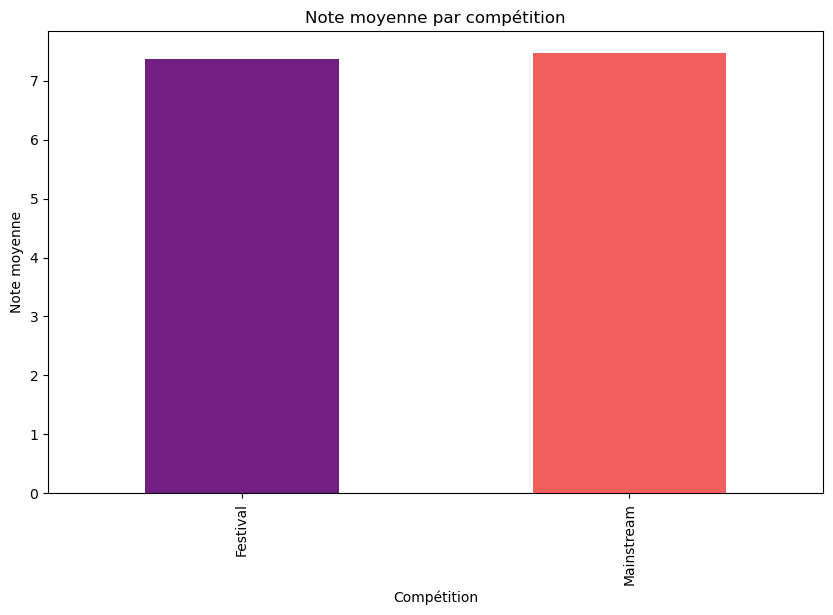

In [46]:
# On utilise la méthode explode
df_filtered['Type_awards'] = df_filtered['Type_awards'].apply(ast.literal_eval)
df_awards = df_filtered.explode('Type_awards')

# On regroupe par type de compétition et on calcule la moyenne
mean_note_per_awards = df_awards.groupby('Type_awards')['vote_average'].mean()

# On représente le résultat
colors = sns.color_palette("magma", n_colors=2)
plt.figure(figsize=(10, 6))
mean_note_per_awards.sort_values().plot(kind='bar', color=colors)
plt.title('Note moyenne par compétition')
plt.xlabel('Compétition')
plt.ylabel('Note moyenne')
plt.show()

### **Note moyenne par pays de production**

Comme pour la variable budget, nous allons essayer avec tous les pays, puis en excluant ceux avec trop peu de films produits.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

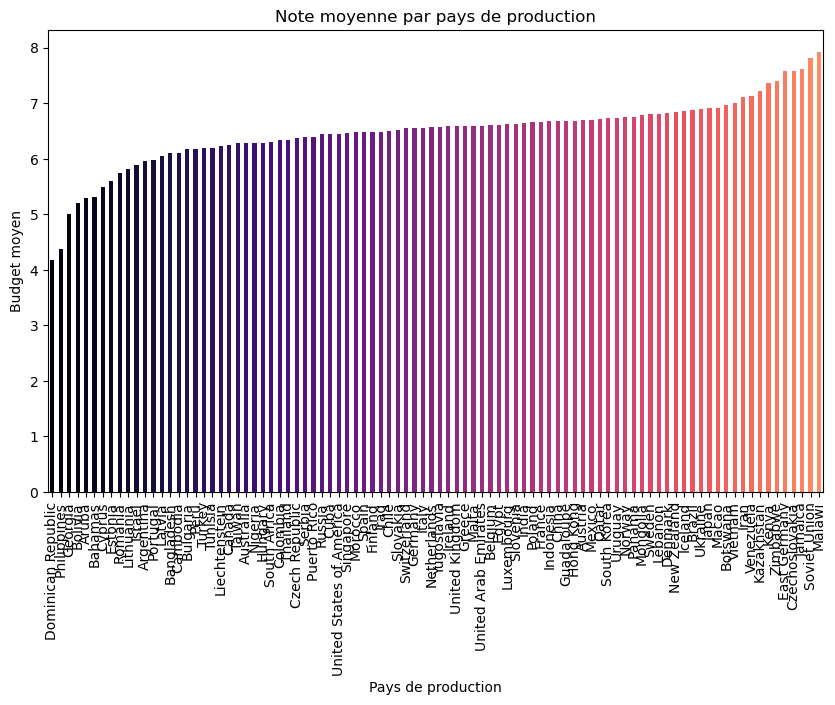

In [47]:
df = fonction_charge('../cleaning_data/Final_database.csv')

# On utilise la méthode explode
df_country = df.explode('countries_prod')

# On groupe par pays
mean_note_per_country = df_country.groupby('countries_prod')['vote_average'].mean()

# On représente le résultat
plt.figure(figsize=(10, 6))
mean_note_per_country.sort_values().plot(kind='bar', color=colors2)
plt.title('Note moyenne par pays de production')
plt.xlabel('Pays de production')
plt.ylabel('Budget moyen')
plt.show()

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

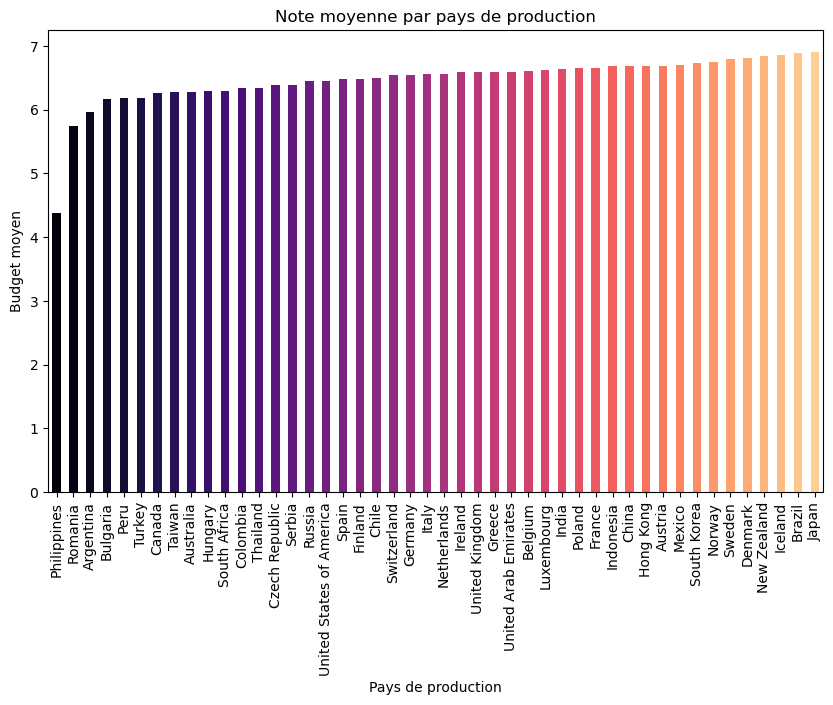

In [48]:
df = fonction_charge('../cleaning_data/Final_database.csv')

# On utilise la méthode explode
df_country = df.explode('countries_prod')

# On compte le nombre de films produits par pays, et on définit une limite
country_counts = df_country['countries_prod'].value_counts()
min_movies_threshold = 10  # Adjust this threshold as needed

# On filtre la base pour ne garder que les pays produisant suffisament de films
df_10 = df_country[df_country['countries_prod'].isin(country_counts[country_counts >= min_movies_threshold].index)]

# On regroupe par pays et on calcule la moyenne
mean_note_per_country = df_10.groupby('countries_prod')['vote_average'].mean()


# On représente le résultat
plt.figure(figsize=(10, 6))
mean_note_per_country.sort_values().plot(kind='bar', color=colors5)
plt.title('Note moyenne par pays de production')
plt.xlabel('Pays de production')
plt.ylabel('Budget moyen')
plt.show()

### **Note moyenne par langue originale du film**

On s'intéresse pour finir, à si les notes varient beaucoup en fonction des langues des films.

/tmp/ipykernel_4708/49747245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['release_date'] = pd.to_datetime(df_f['release_date'])
/tmp/ipykernel_4708/49747245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['budget'] = pd.to_numeric(df_f['budget'], errors='coerce')
/tmp/ipykernel_4708/49747245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

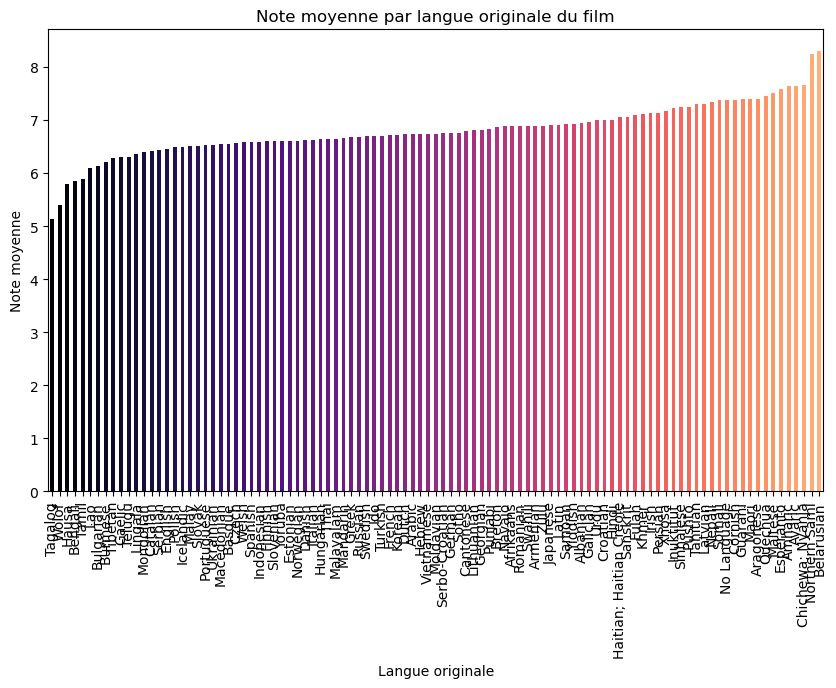

In [49]:
df = fonction_charge('../cleaning_data/Final_database.csv')


# On utilise la méthode explode
df_languages = df.explode('languages_list')

# On regroupe par langue
mean_note_per_language = df_languages.groupby('languages_list')['vote_average'].mean()

# On représente le résultat
plt.figure(figsize=(10, 6))
mean_note_per_language.sort_values().plot(kind='bar', color=colors2)
plt.title('Note moyenne par langue originale du film')
plt.xlabel('Langue originale')
plt.ylabel('Note moyenne')
plt.show()